In [140]:
# COMP386: Computational Neuroscience
# Receptive Field HW, due 9/28/2018
#Angie Georgaras, Carolina Cervantes, Pragna Bhatt, Vaishu Pernenkil

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pylab as py
import math


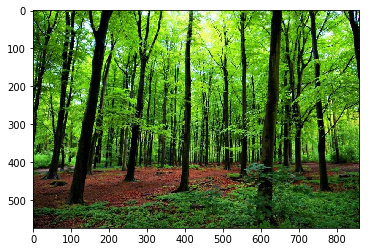

In [141]:
img1=mpimg.imread('tree.jpg')
imgplot = plt.imshow(img1)

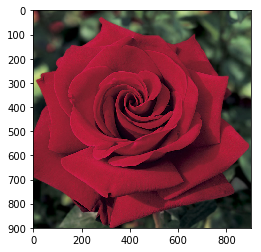

In [142]:
img2=mpimg.imread('flower.jpg')
imgplot = plt.imshow(img2)

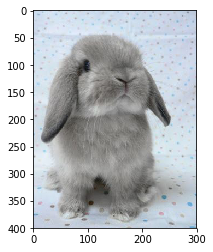

In [143]:
img3=mpimg.imread('bunny.jpg')
imgplot = plt.imshow(img3)

In [144]:
#below is the code dr.albert gave us! slightly modified with tree image

mean before centering: 3.440428240775569e-05
mean after centering: 3.5236570605778894e-19


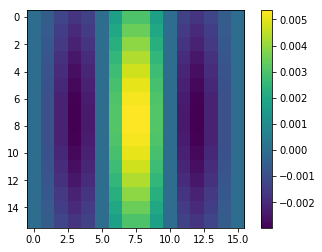

In [145]:
def gaborCalc(x, y, sx, sy, fx, fy):
    p1 = (1 / (2 * math.pi * sx * sy))
    p2 = math.exp(-0.5 * (((x * x) / (sx * sx)) + ((y * y) / (sy * sy))))
    p3 = math.cos(2 * math.pi * (fx * x + fy * y))
    return p1 * p2 * p3

def gaborFilter(sizeX=16, sizeY=16, sx=4.0, sy=7.0, fx=0.1, fy=0.0):
    return [[gaborCalc(x - 7.5, y - 7.5, sx, sy, fx, fy) for x in range(sizeX)] for y in range(sizeY)]
gabor_filter = gaborFilter()
print('mean before centering:', np.mean(gabor_filter))
gabor_filter = np.array(gabor_filter)
pos_ind = gabor_filter >= 0
neg_ind = gabor_filter < 0
pos_sum = np.sum(gabor_filter[pos_ind])
neg_sum = np.sum(gabor_filter[neg_ind])
gabor_filter[neg_ind] = - pos_sum / neg_sum * gabor_filter[neg_ind]
gabor_filter = list(gabor_filter)
print('mean after centering:', np.mean(gabor_filter))
py.imshow(gabor_filter)
py.colorbar()

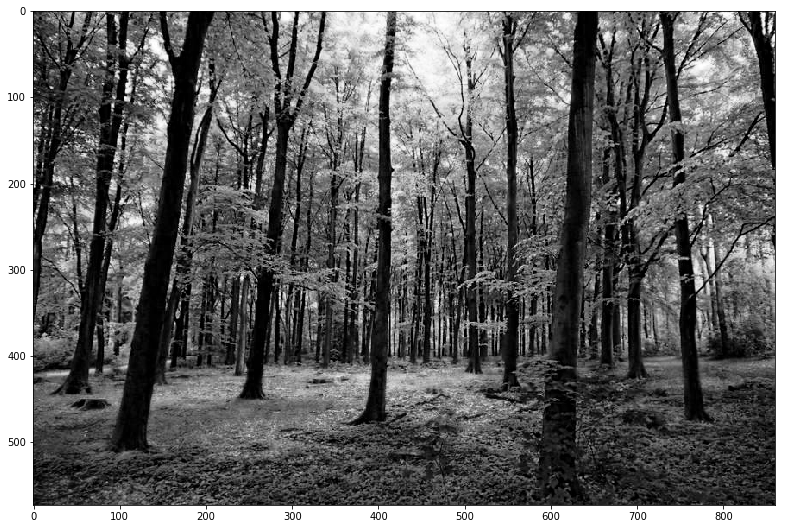

In [146]:
img1=mpimg.imread('tree.jpg')
img1=img1[:,:,0]
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 1)
imgplot = plt.imshow(img1, cmap=py.cm.Greys_r)

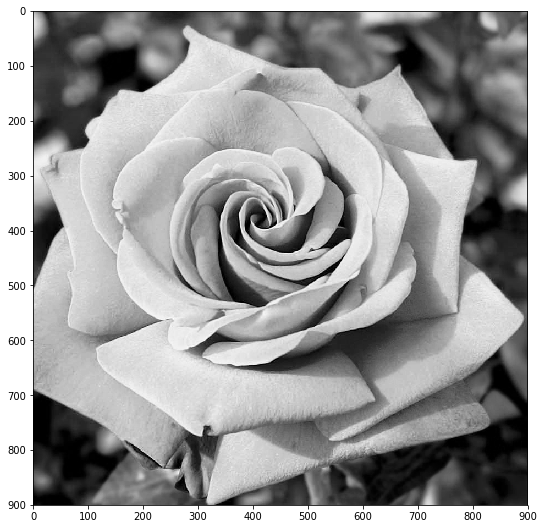

In [147]:
img2=mpimg.imread('flower.jpg')
img2=img2[:,:,0]
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 1)
imgplot = plt.imshow(img2, cmap=py.cm.Greys_r)

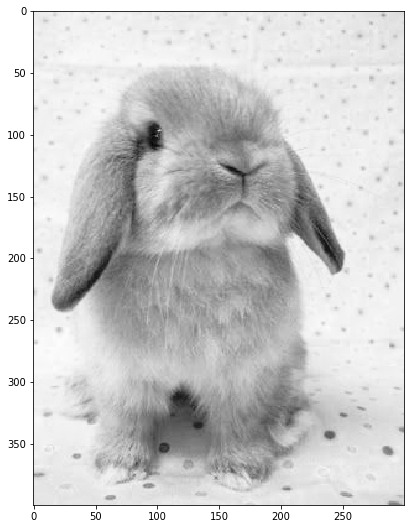

In [148]:
img3=mpimg.imread('bunny.jpg')
img3=img3[:,:,0]
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 1)
imgplot = plt.imshow(img3, cmap=py.cm.Greys_r)

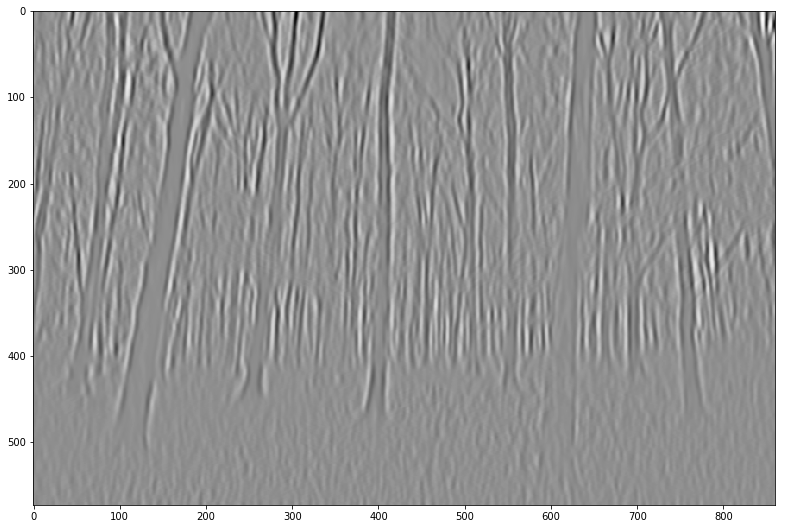

In [149]:
# Convolve with the gabor filter
img_gabor = ndimage.convolve(img1, gabor_filter, mode='reflect', cval=0.0)
img_gabor = ndimage.convolve(img1.astype(float), gabor_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gabor, cmap=py.cm.Greys_r)
#Simple cell receptive field image! 

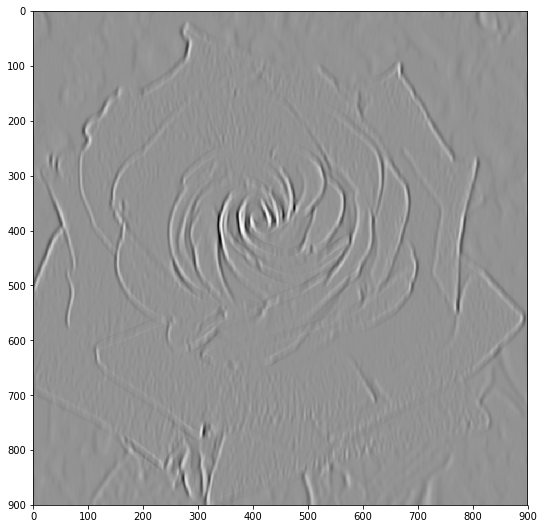

In [150]:
# gabor filter for image 2
img_gabor = ndimage.convolve(img2, gabor_filter, mode='reflect', cval=0.0)
img_gabor = ndimage.convolve(img2.astype(float), gabor_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gabor, cmap=py.cm.Greys_r)
 

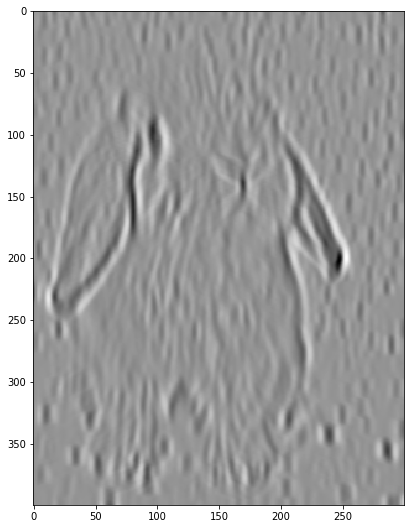

In [151]:
# gabor filter for image 3
img_gabor = ndimage.convolve(img3, gabor_filter, mode='reflect', cval=0.0)
img_gabor = ndimage.convolve(img3.astype(float), gabor_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gabor, cmap=py.cm.Greys_r)
 

In [152]:
def gaussianCalc(x, y, sigma, k):
    p1 = (1 / (2 * math.pi * (math.exp(sigma))))
    p2 = math.exp(-1.0 * ((((x * x) + (y*y))) / (math.exp (2 * sigma))))
    p3 = 1/(2 * math.pi * (k*k) * (sigma*sigma)) * math.exp(-1.0*((x*x) + (y*y))/(2 * (k*k)*(sigma*sigma)))
    return p1 * p2 - p3

mean before centering: 0.007432443062663378
mean after centering: 6.505213034913027e-19


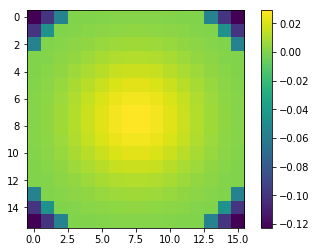

In [153]:
def gaussianFilter(sizeX=16, sizeY=16, sigma = 1.6, k = 5 ):
    return [[gaussianCalc(x - 7.5, y - 7.5, sigma, k) for x in range(sizeX)] for y in range(sizeY)]
gaussian_filter = gaussianFilter()
print('mean before centering:', np.mean(gaussian_filter))
gaussian_filter = np.array(gaussian_filter)
pos_ind = gaussian_filter >= 0
neg_ind = gaussian_filter < 0
pos_sum = np.sum(gaussian_filter[pos_ind])
neg_sum = np.sum(gaussian_filter[neg_ind])
gaussian_filter[neg_ind] = - pos_sum / neg_sum * gaussian_filter[neg_ind]
gaussian_filter = list(gaussian_filter)
print('mean after centering:', np.mean(gaussian_filter))
py.imshow(gaussian_filter)
py.colorbar()

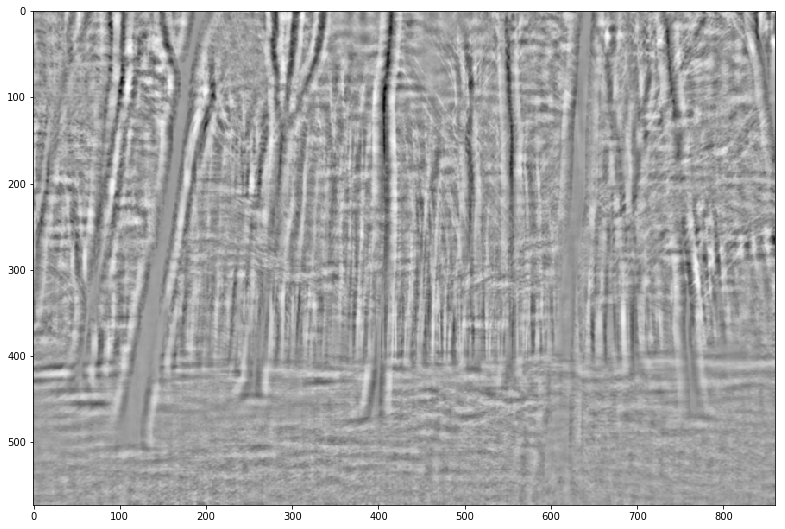

In [154]:
# Convolve with the gaussian filter
img_gaussian = ndimage.convolve(img1, gaussian_filter, mode='reflect', cval=0.0)
img_gaussian = ndimage.convolve(img1.astype(float), gaussian_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gaussian, cmap=py.cm.Greys_r)


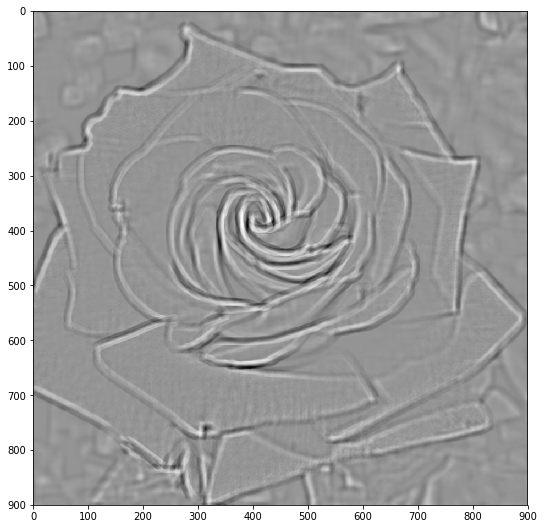

In [155]:
#gaussian filter image 2
img_gaussian = ndimage.convolve(img2, gaussian_filter, mode='reflect', cval=0.0)
img_gaussian = ndimage.convolve(img2.astype(float), gaussian_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gaussian, cmap=py.cm.Greys_r)

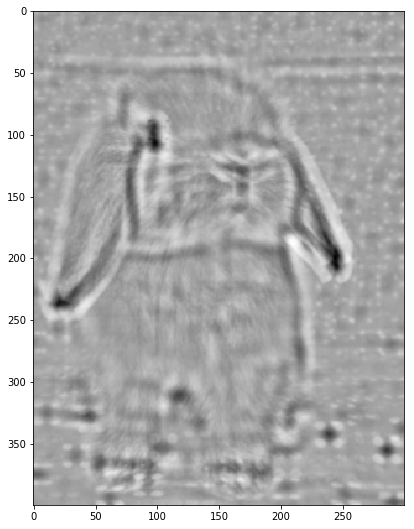

In [156]:
# gaussian filter image 3
img_gaussian = ndimage.convolve(img3, gaussian_filter, mode='reflect', cval=0.0)
img_gaussian = ndimage.convolve(img3.astype(float), gaussian_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gaussian, cmap=py.cm.Greys_r)